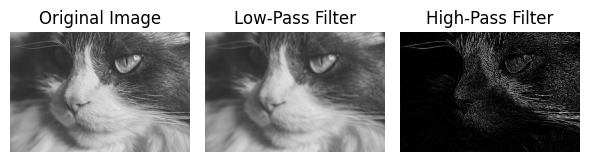

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('grayscale_image.jpg')

low_pass_kernel = np.ones((5, 5), np.float32) / 25
high_pass_kernel = np.array([[-1, -1, -1],
                              [-1,  8, -1],
                              [-1, -1, -1]])

low_pass_result = cv2.filter2D(image, -1, low_pass_kernel)

high_pass_result = cv2.filter2D(image, -1, high_pass_kernel)

plt.figure(figsize=(6,6))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Low-Pass Filter")
plt.imshow(low_pass_result, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("High-Pass Filter")
plt.imshow(high_pass_result, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


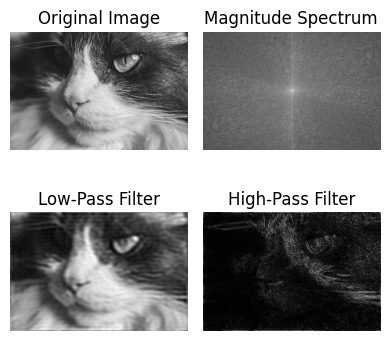

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('grayscale_image.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    raise FileNotFoundError("Error: Could not load image. Make sure the file exists and the path is correct.")

if len(image.shape) != 2: 
    raise ValueError("The loaded image is not a 2D grayscale image. Please provide a proper grayscale image.")

f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  

rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
mask_low = np.zeros((rows, cols), np.uint8)
cv2.circle(mask_low, (ccol, crow), 30, 1, -1)


mask_high = np.ones((rows, cols), np.uint8)
cv2.circle(mask_high, (ccol, crow), 30, 0, -1)

fshift_low = fshift * mask_low
f_ishift_low = np.fft.ifftshift(fshift_low)
low_pass_result = np.abs(np.fft.ifft2(f_ishift_low))

fshift_high = fshift * mask_high
f_ishift_high = np.fft.ifftshift(fshift_high)
high_pass_result = np.abs(np.fft.ifft2(f_ishift_high))

plt.figure(figsize=(4, 4))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Low-Pass Filter")
plt.imshow(low_pass_result, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("High-Pass Filter")
plt.imshow(high_pass_result, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
